In [1]:
# Importing packages

from glob import glob
from os.path import join
from os import getcwd
from xcodex.main import download_file, xco2_extract

In [2]:
# Setting historical serie

start_date = "1st of January, 2015"
end_date = "31st of December, 2015"

download_file(start_date, end_date) # Downloading .nc4 files (Global)

In [3]:
arquive_folder = glob(join(getcwd(), "downloaded_data", "*.nc4")) # Selecting the folder with nc4 files (Default location)

# Setting desired locations to build a time series XCO2 data

locations = dict(Mauna_loa=[19.479488, -155.602829],
                 New_York=[40.712776, -74.005974],
                 Paris=[48.856613, 2.352222])

In [8]:
df = xco2_extract(path=arquive_folder,
                  start=start_date,
                  end=end_date,
                  missing_data=False,
                  **locations); df # Extracting XCO2

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\henri\anaconda3\envs\new_env\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\henri\AppData\Local\Temp\ipykernel_2176\1500129882.py", line 1, in <module>
    df = xco2_extract(path=arquive_folder,
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\henri\anaconda3\envs\new_env\Lib\site-packages\xcodex\main.py", line 163, in xco2_extract
    dataframe = make_dataframe(city, jd, day, month, year, lat, lon, lat_index,
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\henri\anaconda3\envs\new_env\Lib\site-packages\Util\make_Dataframe.py", line 43, in make_dataframe
    dataframe.sort_values(by=['city', 'year'], inplace=True)
  File "C:\Users\henri\anaconda3\envs\new_env\Lib\site-packages\pandas\core\frame.py", line 6750, in sort_values
    keys = [self._get_label_or_level_values(x, axis=a

# Data visualization

In [7]:
## set mapbox access token
import plotly.express as px
import plotly.graph_objs as go

px.set_mapbox_access_token('pk.eyJ1Ijoic2FnYXJsaW1idTAiLCJhIjoiY2t2MXhhMm5mNnE5ajJ3dDl2eDZvNTM2NiJ9.1bwmb8HPgFZWwR8kcO5rOA')

# Plotly configs

fig= px.scatter_mapbox(df,
                              lat= 'lat',
                              lon= 'lon',
                              color= 'XCO2',
                              zoom= .85,
                              width=960,
                              height=540,
                              size_max=10,
                              hover_name='location',
                              color_continuous_scale=px.colors.cyclical.IceFire)

fig.update_layout(mapbox_style="open-street-map") #dark


layout = go.Layout(margin=go.layout.Margin(
    l=0,
    r=0,
    b=0,
    t=0))


fig.update_layout(layout,
                  autosize=False,
                  height=540,
                  width=960,
                  hovermode="closest")

# Saving the output image

#fig.write_html('xcodex_map.html')
#fig.write_image("xcodex_map.png", scale=2)

fig.show()

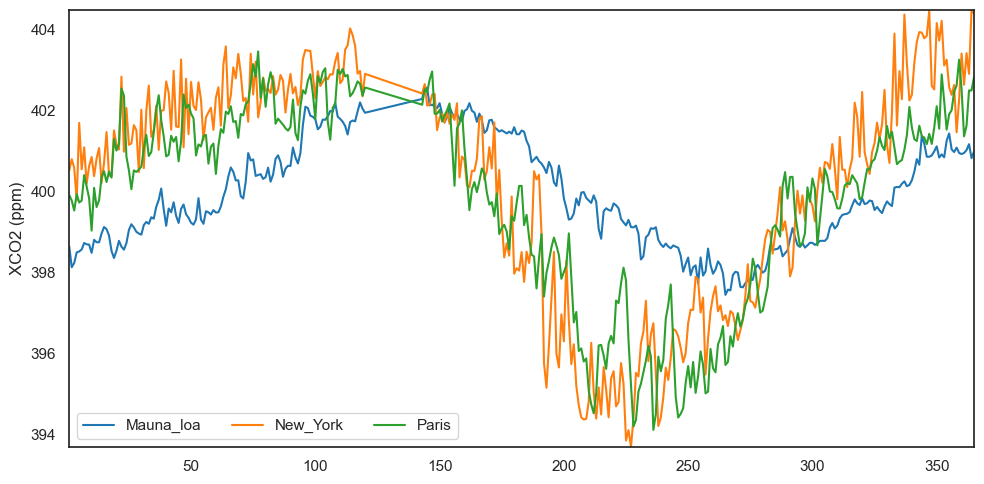

In [6]:
# Showing XCO2 behavior in time serie

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

sns.set_theme(font_scale=1, style="white")

sns.lineplot(data=df,
             x="jd",
             y='XCO2',
             hue='location',
             errorbar=('ci',0),
             palette="tab10")

plt.xlabel("days")
plt.ylabel("XCO2 (ppm)")

plt.xlim(min(df.jd), max(df.jd))
plt.ylim(min(df.xco2), max(df.xco2))

sns.despine(right=False,
            top=False)

plt.legend(ncol=3)

plt.tight_layout()

#plt.savefig("xcodex_locations.png", dpi=300)

plt.show()